In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import r2_score
from math import sqrt
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pickle

In [4]:
from google.colab import files
uploaded = files.upload()

Saving cleaned2.csv to cleaned2.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cleaned2.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
df = pd.read_csv("cleaned2.csv")

In [7]:
df.head()

,Unnamed: 0,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,0,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,clean,other,2,other,south
1,1,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,clean,automatic,2,sedan,south
2,2,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,clean,automatic,2,SUV,south
3,5,29590,2016.0,toyota,good,6 cylinders,gas,33290.0,clean,other,4,pickup,south
4,6,39990,2012.0,ford,good,8 cylinders,gas,9692.0,clean,other,2,coupe,south


In [8]:
df["price"]=np.log1p(df["price"])

## Encoding

### For Numerical Data

#### year

In [9]:
year_min = df["year"].min()
year_max = df["year"].max()
df["year"] = ((df["year"] - year_min) / (year_max - year_min))

#### odometer

In [10]:
odo_min = df["odometer"].min()
odo_max = df["odometer"].max()
df["odometer"] = ((df["odometer"] - odo_min) / (odo_max - odo_min))

### For Ordinal Data

#### cylinders

In [11]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(list(df['cylinders'].astype(str).values))
df['cylinders'] = label_encoder.transform(list(df['cylinders'].astype(str).values))

In [12]:
#Normalizing Cylinder
cyl_min = df["cylinders"].min()
cyl_max = df["cylinders"].max()
df["cylinders"] = ((df["cylinders"] - cyl_min) / (cyl_max - cyl_min))

### OneHotEncoding

In [13]:
train_df = pd.get_dummies(df)

In [14]:
len(train_df)

318824

In [15]:
train_df.head(15)

,Unnamed: 0,price,year,cylinders,odometer,drive,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_hennessey,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_unknown,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_midwest,state_northeast,state_south,state_west
0,0,10.491024,0.583333,0.857143,0.130950,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,8.922792,0.750000,0.428571,0.374431,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2,8.497195,0.416667,0.714286,0.348210,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5,10.295226,0.833333,0.714286,0.133143,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,6,10.596410,0.666667,0.857143,0.038732,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,8,10.373210,0.875000,0.714286,0.118436,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,10,10.221978,0.666667,1.000000,0.756107,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,11,10.518430,0.708333,0.857143,0.203821,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,12,10.126271,0.833333,0.714286,0.231706,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9,13,8.698848,0.583333,1.000000,0.504057,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Splitting the Data into test and train

In [16]:
y = train_df["price"]
x = train_df.drop(['price', 'Unnamed: 0'], axis=1)
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.head()

,year,cylinders,odometer,drive,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_hennessey,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_unknown,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_midwest,state_northeast,state_south,state_west
220052,0.958333,0.714286,0.040324,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
10665,0.333333,0.428571,0.273475,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
102772,0.750000,0.428571,0.308018,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
90016,0.791667,0.428571,0.528394,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
294161,0.708333,1.000000,0.386033,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


### GradientBoosting Model

In [ ]:
#GradientBoosting model
gb_model = GradientBoostingRegressor(
    n_estimators = 500, 
    max_depth = 8, 
    learning_rate = 0.3)

In [ ]:
#Training the Gradient boost model
gb_model = gb_model.fit(x_train, y_train)

In [ ]:
#Predict test
y_pred=gb_model.predict(x_test)
#Predict train
train_pred = gb_model.predict(x_train)

In [ ]:
#train RMSE - Gradient Boosting
mse1 = mean_squared_error(y_train, train_pred)
rmse1 = sqrt(mse1)
print("rmse(Train):", rmse1)
#test RMSE - Gradient Boosting
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print("rmse(Test):", rmse)

rmse(Train): 0.17601133539453415
rmse(Test): 0.24093804152870604


In [ ]:
#train R^2 - Gradient Boosting
r_sqr1 = r2_score(y_train, train_pred)
print("r_squared(Train):",r_sqr1)
#test R^2 - Gradient Boosting
r_sqr = r2_score(y_test, y_pred)
print("r_squared(Test):",r_sqr)

r_squared(Train): 0.9419211760677981
r_squared(Test): 0.8904693880125519


In [ ]:
#feature importance for Gradient Boost Model
cat_columns=['manufacturer','condition','cylinders','fuel','title_status','transmission','type','state']
feature_imp = pd.DataFrame(list(zip(gb_model.feature_importances_,x_train)),columns = ("importance","features"))

feature_split = pd.DataFrame(feature_imp["features"].str.split("_",n = 1, expand = True))
feature_cat = pd.concat([feature_imp["importance"], feature_split], axis=1, join='inner')
feature_cat.columns = ["importance","feature","split2"]
feature_score = feature_cat.groupby('feature', as_index=False)['importance'].sum()
feature_score

,feature,importance
0,condition,0.011150
1,cylinders,0.090051
2,drive,0.061085
3,fuel,0.050421
4,manufacturer,0.064249
5,odometer,0.154596
6,state,0.012669
7,title,0.005643
8,transmission,0.006020
9,type,0.064639


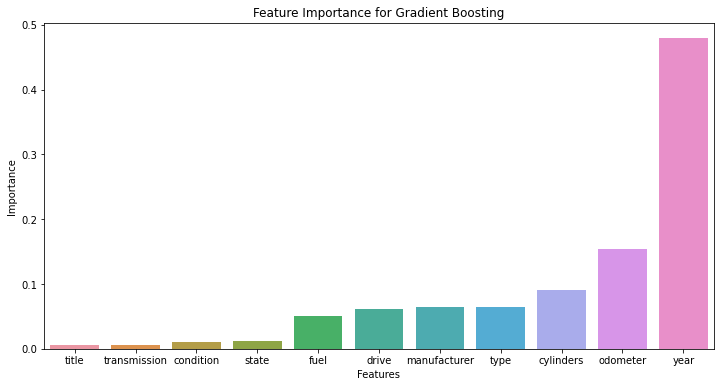

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=feature_score.feature, y=feature_score.importance,order = feature_score.sort_values('importance').feature)
plt.title("Feature Importance for Gradient Boosting")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

### XGBoost

In [ ]:
#XGBoost Model
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=5
)

In [ ]:
#Training the XGBoost Model
regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Predict test
y_pred = regressor.predict(x_test)
#Predict train
train_pred = regressor.predict(x_train)

In [ ]:
#train RMSE - XGBoost
mse_train = mean_squared_error(y_train, train_pred)
rmse = math.sqrt(mse_train)
print("rmse(Train):",rmse)
#test RMSE - XGBoost
mse = mean_squared_error(y_test,y_pred)
rmse=math.sqrt(mse)
rmse
print("rmse(Test):",rmse)

rmse(Train): 0.2754892285733874
rmse(Test): 0.28333842752516675


In [ ]:
#train R^2 - XGBoost
r_sqr1 = r2_score(y_train, train_pred)
print("r_squared(Train):",r_sqr1)
#test R^2 - XGBoost
r_sqr = r2_score(y_test, y_pred)
print("r_squared(Test):",r_sqr)

r_squared(Train): 0.8577193686904432
r_squared(Test): 0.8485268276098412


In [ ]:
#feature importance for XGBoost Model
cat_columns=['manufacturer','condition','cylinders','fuel','title_status','transmission','type','state']
feature_imp = pd.DataFrame(list(zip(regressor.feature_importances_,x_train)),columns = ("importance","features"))

feature_split = pd.DataFrame(feature_imp["features"].str.split("_",n = 1, expand = True))
feature_cat = pd.concat([feature_imp["importance"], feature_split], axis=1, join='inner')
feature_cat.columns = ["importance","feature","split2"]
feature_score = feature_cat.groupby('feature', as_index=False)['importance'].sum()
feature_score

,feature,importance
0,condition,0.016470
1,cylinders,0.028663
2,drive,0.045809
3,fuel,0.121036
4,manufacturer,0.404269
5,odometer,0.027604
6,state,0.021960
7,title,0.021583
8,transmission,0.018939
9,type,0.178855


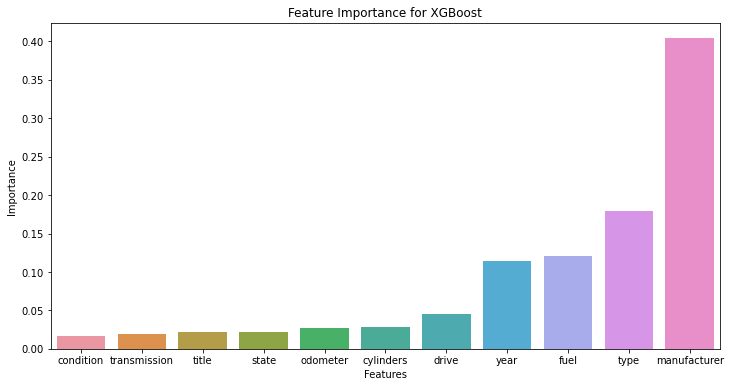

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=feature_score.feature, y=feature_score.importance,order = feature_score.sort_values('importance').feature)
plt.title("Feature Importance for XGBoost")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

### Random Forest

In [ ]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0,n_jobs=-1)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=0)

In [ ]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

# Metrics
print('rmse (Test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("r2 (Test):{}".format(regressor.score(x_test, y_test)))

print('rmse (Train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("r2 (Train):{}".format(regressor.score(x_train, y_train)))

rmse (Test): 0.2373519320593456
r2 (Test):0.8937056195219538
rmse (Train): 0.0944379846368207
r2 (Train):0.9832802431067738


# Lasso Regression

In [18]:
lassoRegressor=Lasso(alpha= 0.007761033)
lassoRegressor.fit(x_train,y_train)
lassoTrainPrediction=lassoRegressor.predict(x_train)
lassoTestPrediction=lassoRegressor.predict(x_test)

In [20]:
testRmse=math.sqrt(mean_squared_error(y_test,lassoTestPrediction))
trainRmse=math.sqrt(mean_squared_error(y_train,lassoTrainPrediction))
print("Test RMSE {0}".format(testRmse))
lassoRSquaredTest=lassoRegressor.score(x_test, y_test)
print("Test R-Squared {0}".format(lassoRSquaredTest))
print("Train RMSE {0}".format(trainRmse))
lassoRSquaredTrain=lassoRegressor.score(x_train,y_train)
print("Train R-Squared {0}".format(lassoRSquaredTrain))

Test RMSE 0.4010149946855839
Test R-Squared 0.6965787546457697
Train RMSE 0.39881175668101554
Train R-Squared 0.7018241659711835


# Ridge Regression

In [23]:
ridgeRegressor=Ridge(alpha=0.415545)
ridgeRegressor.fit(x_train,y_train)
trainPrediction=ridgeRegressor.predict(x_train)
testPrediction=ridgeRegressor.predict(x_test)

In [24]:
testRmseRidge=math.sqrt(mean_squared_error(y_test,testPrediction))
trainRmseRidge=math.sqrt(mean_squared_error(y_train,trainPrediction))
print("Test RMSE {0}".format(testRmseRidge))
ridgeRSquaredTest=ridgeRegressor.score(x_test, y_test)
print("Test R-Squared {0}".format(ridgeRSquaredTest))
print("Train RMSE {0}".format(trainRmseRidge))
ridgeRSquaredTrain=ridgeRegressor.score(x_train,y_train)
print("Train R-Squared {0}".format(ridgeRSquaredTrain))

Test RMSE 0.35772715172461406
Test R-Squared 0.7585492427381446
Train RMSE 0.35572019559117407
Train R-Squared 0.7627787540855974
